In [9]:
import collections.abc

import tensorflow as tf
import keras

from keras import models, layers, Input

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



## Linear Regression

In [10]:

model = models.Sequential()
model.add(layers.InputLayer(shape=(4,)))
model.add(layers.Dense(1))
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5 (20.00 B)

 Trainable params: 5 (20.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse', metrics=['mae'])


In [12]:
from sklearn.datasets import make_regression

X,y = make_regression(
  n_samples=5000, 
  n_features=4, 
  n_informative=3,
  noise=2
)
X_train, X_test, y_train, y_test = train_test_split(
  X, 
  y,
  test_size=0.33, 
  random_state=42
)

In [13]:
history = model.fit(X_train, y_train,
  batch_size=32, epochs=40, validation_split=0.3)


Epoch 1/40
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4047.3459 - mae: 50.6264 - val_loss: 3079.8257 - val_mae: 44.8839
Epoch 2/40
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2839.8223 - mae: 42.1117 - val_loss: 2302.2854 - val_mae: 38.8047
Epoch 3/40
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2204.4683 - mae: 37.3367 - val_loss: 1718.0244 - val_mae: 33.5179
Epoch 4/40
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1547.2496 - mae: 31.3726 - val_loss: 1285.3912 - val_mae: 28.9889
Epoch 5/40
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1150.4573 - mae: 26.9910 - val_loss: 961.8276 - val_mae: 25.0720
Epoch 6/40
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 882.4437 - mae: 23.5991 - val_loss: 717.8600 - val_mae: 21.6558
Epoch 7/40
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 718.1860 - mae: 21.2826 - val_loss: 538.1911 - val_mae: 18.7450
Epoch 8/40
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 497.3809 - mae: 17.7877 - val_loss: 401.6599 - val_mae: 16.1861
Epoch 9/40
74/7

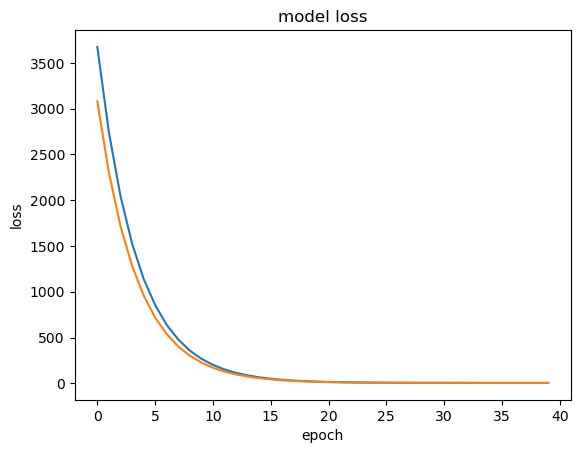

In [14]:
def plot_loss(history):
  """ Plot training, test loss. """
  if not isinstance(history, list):
    history = [history]
  
  for i, h in enumerate(history):
    plt.plot(h.history['loss'])
    plt.plot(h.history['val_loss'])
    plt.title('model loss')
    plt.ylabel(f'loss')
    plt.xlabel('epoch')
  # plt.legend.show()
    # plt.legend(['{i}train', 'test'])
    
  plt.show()

plot_loss(history)

## Richer Model

/Users/ssogden/miniconda3/envs/cst463/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 20)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 541 (2.11 KB)

 Trainable params: 541 (2.11 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2770.2734 - mae: 36.1288 - val_loss: 26.1214 - val_mae: 4.0276
Epoch 2/40
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 19.2141 - mae: 3.4698 - val_loss: 6.7780 - val_mae: 2.0876
Epoch 3/40
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.6370 - mae: 1.8884 - val_loss: 19.5090 - val_mae: 3.5674
Epoch 4/40
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.2580 - mae: 1.9578 - val_loss: 5.4981 - val_mae: 1.8484
Epoch 5/40
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.7979 - mae: 1.7413 - val_loss: 5.4116 - val_mae: 1.8807
Epoch 6/40
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.9243 - mae: 1.7703 - val_loss: 7.4600 - val_mae: 2.1862
Epoch 7/40
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.9159 - mae: 1.9576 - val_loss: 5.6110 - val_mae: 1.8943
Epoch 8/40
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.7813 - mae: 1.7355 - val_loss: 4.3705 - val_mae: 1.6771
Epoch 9/40
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.4288

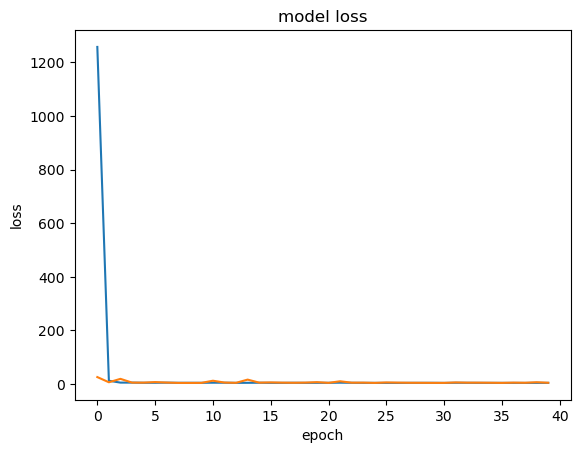

In [15]:
# two hidden layers, sigmoid activation
model_rich = models.Sequential()
model_rich.add(layers.InputLayer(input_shape=(4,)))
model_rich.add(layers.Dense(20, activation='relu'))
model_rich.add(layers.Dense(20, activation='relu'))
model_rich.add(layers.Dense(1))
model_rich.summary()

opt = keras.optimizers.SGD(learning_rate=0.001)
model_rich.compile(optimizer=opt, loss='mse', metrics=['mae'])

history_rich = model_rich.fit(
  X_train, 
  y_train,
  batch_size=32, 
  epochs=40, 
  validation_split=0.3
)

plot_loss(history_rich)


## Messing around with layer types


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 20)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/400
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4382.1235 - mae: 52.4142 - val_loss: 4042.0686 - val_mae: 51.4233
Epoch 2/400
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4046.6445 - mae: 50.1487 - val_loss: 3595.5427 - val_mae: 48.3570
Epoch 3/400
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3664.2756 - mae: 47.2644 - val_loss: 2630.7041 - val_mae: 40.7400
Epoch 4/400
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2348.3118 - mae: 37.0562 - val_loss: 1300.8240 - val_mae: 27.0970
Epoch 5/400
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 992.4407 - mae: 22.2519 - val_loss: 388.8291 - val_mae: 12.6041
Epoch 6/400
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 313.1591 - mae: 10.4113 - val_loss: 116.3323 - val_mae: 7.5175
Epoch 7/400
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 113.5616 - mae: 7.4385 - val_loss: 84.4992 - val_mae: 7.2970
Epoch 8/400
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 86.5849 - mae: 7.3212 - val_loss: 80.1190 - val_mae: 7.3853
Epoch 9/400
74/7

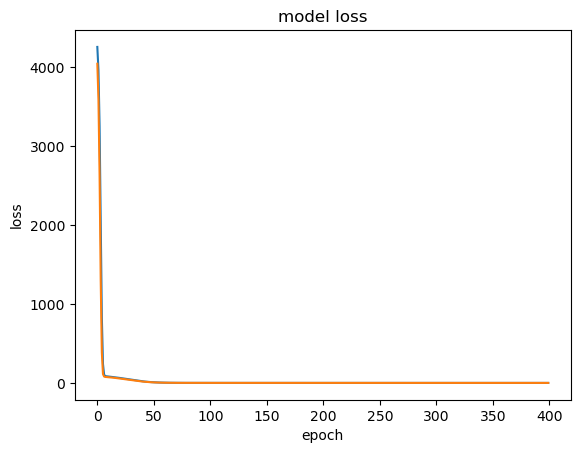

In [22]:
# two hidden layers, sigmoid activation
model_relus = models.Sequential()
model_relus.add(layers.InputLayer(input_shape=(4,)))
model_relus.add(layers.Dense(20, activation='relu'))
model_relus.add(layers.Dense(1))
model_relus.summary()

opt = keras.optimizers.SGD(learning_rate=0.0001)
model_relus.compile(optimizer=opt, loss='mse', metrics=['mae'])

history_relus = model_relus.fit(
  X_train,
  y_train,
  batch_size=32,
  epochs=400,
  validation_split=0.3
)

plot_loss(history_relus)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 20)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/400
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4193.8657 - mae: 51.4876 - val_loss: 4228.9707 - val_mae: 52.6151
Epoch 2/400
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4582.1929 - mae: 53.3905 - val_loss: 4211.9927 - val_mae: 52.5053
Epoch 3/400
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4526.6836 - mae: 53.0735 - val_loss: 4191.9351 - val_mae: 52.3751
Epoch 4/400
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4442.6484 - mae: 52.9174 - val_loss: 4166.2271 - val_mae: 52.2063
Epoch 5/400
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4185.9756 - mae: 51.2285 - val_loss: 4133.3589 - val_mae: 51.9904
Epoch 6/400
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4337.5688 - mae: 52.2190 - val_loss: 4090.4543 - val_mae: 51.7054
Epoch 7/400
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4144.8281 - mae: 51.0487 - val_loss: 4036.2822 - val_mae: 51.3394
Epoch 8/400
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4183.6338 - mae: 51.2547 - val_loss: 3968.1731 - val_mae: 50.8706


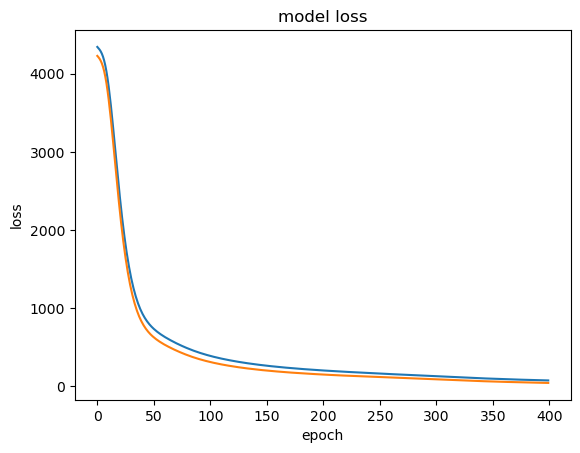

In [23]:
# two hidden layers, sigmoid activation
model_sigmoid = models.Sequential()
model_sigmoid.add(layers.InputLayer(input_shape=(4,)))
model_sigmoid.add(layers.Dense(20, activation='sigmoid'))
model_sigmoid.add(layers.Dense(1))
model_sigmoid.summary()

opt = keras.optimizers.SGD(learning_rate=0.0001)
model_sigmoid.compile(optimizer=opt, loss='mse', metrics=['mae'])

history_sigmoid = model_sigmoid.fit(
  X_train,
  y_train,
  batch_size=32,
  epochs=400,
  validation_split=0.3
)

plot_loss(history_sigmoid)
  

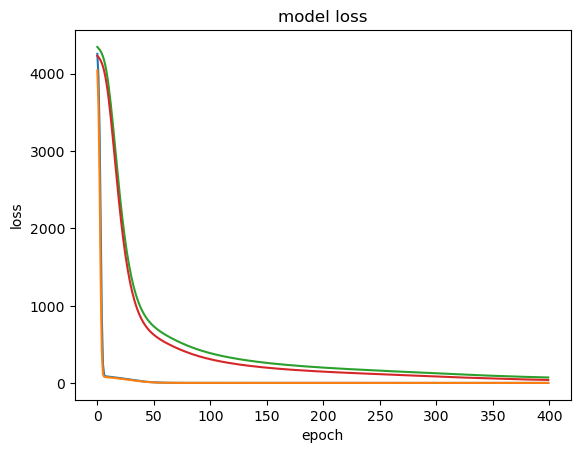

In [24]:
plot_loss([history_relus, history_sigmoid])